In [1]:
import numpy as np
import pandas as pd
#추천도서 이미지 구현용
from PIL import Image
from imageio import imread
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import requests
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
books = pd.read_csv(r'C:\\Users\\ugsuw\\OneDrive\\바탕 화면\\BITamin\\자율 프로젝트 - 도서추천 시스템\\Books.csv',sep=',', index_col=False, dtype='unicode')

In [3]:
ratings = pd.read_csv(r'C:\\Users\\ugsuw\\OneDrive\\바탕 화면\\BITamin\\자율 프로젝트 - 도서추천 시스템\\Ratings.csv')

In [4]:
users = pd.read_csv(r'C:\\Users\\ugsuw\\OneDrive\\바탕 화면\\BITamin\\자율 프로젝트 - 도서추천 시스템\\Users.csv')

In [5]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
#데이터 오류 수정 - 성현님 코드 참고
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [7]:
#새 책이 책 데이터 세트에 추가되지 않는 한 점수 데이터 세트에는 책 데이터 세트에 있는 책만 있어야 합니다.
ratings = ratings[ratings.ISBN.isin(books.ISBN)]

In [8]:
#데이터 전처리 - 민정님 코드 참고
ratings['Count']=1

In [9]:
df=ratings.groupby(['ISBN'])['Count'].sum().reset_index()

In [10]:
df_up=df[df['Count']>=20]['ISBN'].reset_index()

In [11]:
rating=pd.merge(df_up,ratings,left_on='ISBN',right_on='ISBN',how='left')

In [12]:
rating=rating.drop(['index','Count'],axis=1)

In [13]:
rating

,ISBN,User-ID,Book-Rating
0,000649840X,901,9
1,000649840X,11676,8
2,000649840X,16383,10
3,000649840X,20347,0
4,000649840X,21086,0
...,...,...,...
385750,950491036X,259057,0
385751,950491036X,264934,0
385752,950491036X,265834,0
385753,950491036X,269397,0


In [14]:
book=pd.merge(df_up,books,left_on='ISBN',right_on='ISBN',how='left')

In [15]:
book.isnull().sum()

index                     0
ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 0
Image-URL-S               0
Image-URL-M               0
Image-URL-L               0
yearOfPublication      7269
bookAuthor             7269
publisher              7269
bookTitle              7269
dtype: int64

In [16]:
book=book[['ISBN','Book-Title','Book-Author']]

In [17]:
book=book.dropna(axis=0)

In [18]:
book

,ISBN,Book-Title,Book-Author
0,000649840X,Angelas Ashes,Frank Mccourt
1,0006547834,Miss Smillas Feeling for Snow,Peter Hoeg
2,0006550576,Red Leaves,Paullina Simons
3,0006550789,253,Geoff Ryman
4,0007106572,Guilty Creatures,Sue Welfare
...,...,...,...
7264,8845205118,Il Piccolo Principe Prince Italn,Antoine de Saint-ExupÃ©ry
7265,8845247414,Il Piccolo Principe,Antoine De Saint-Exupery
7266,884590184X,Siddharta Romanzo Versione Di M Mila,Hermann Hesse
7267,8885989403,Va' dove ti porta il cuore (Romanzi e racconti),Susanna Tamaro


In [19]:
final_data=pd.merge(rating,book,on='ISBN')
final_data.head()

,ISBN,User-ID,Book-Rating,Book-Title,Book-Author
0,000649840X,901,9,Angelas Ashes,Frank Mccourt
1,000649840X,11676,8,Angelas Ashes,Frank Mccourt
2,000649840X,16383,10,Angelas Ashes,Frank Mccourt
3,000649840X,20347,0,Angelas Ashes,Frank Mccourt
4,000649840X,21086,0,Angelas Ashes,Frank Mccourt


In [20]:
df_user_books_ratings=final_data.pivot_table('Book-Rating',index='User-ID',columns='ISBN').fillna(0)

In [21]:
df_user_books_ratings

ISBN,000649840X,0006547834,0006550576,0006550789,0007106572,0007110928,0007141076,0007154615,0020198817,0020198906,...,880781210X,8807813025,8817106100,8817106259,8817131628,8845205118,8845247414,884590184X,8885989403,950491036X
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


행렬 연산 단계

In [22]:
matrix = df_user_books_ratings.to_numpy()

#사용자 평균 평점
user_ratings_mean = np.mean(matrix, axis=1)

#평점 편차
matrix_user_mean = matrix - user_ratings_mean.reshape(-1,1)

In [23]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
pd.DataFrame(matrix_user_mean, columns = df_user_books_ratings.columns).head()

ISBN,000649840X,0006547834,0006550576,0006550789,0007106572,0007110928,0007141076,0007154615,0020198817,0020198906,...,880781210X,8807813025,8817106100,8817106259,8817131628,8845205118,8845247414,884590184X,8885989403,950491036X
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,...,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825,-0.000825
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,...,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238,-0.001238


In [25]:
#scipy에서 제공하는 svd
#U 행렬, sigma 행렬, V전치 행렬
from scipy.linalg import svd
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(matrix_user_mean, k=12)#k값 조정 필요

In [26]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(55772, 12)
(12,)
(12, 7269)


In [27]:
#대칭행렬 변환
sigma = np.diag(sigma)
sigma.shape

(12, 12)

In [28]:
sigma[0]

array([159.4396951,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ])

In [29]:
sigma[1]

array([  0.        , 162.00477293,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [30]:
#내적
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1,1)

In [31]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_books_ratings.columns)
df_svd_preds #유저와 ISBN넘버 사이 평점조정

ISBN,000649840X,0006547834,0006550576,0006550789,0007106572,0007110928,0007141076,0007154615,0020198817,0020198906,...,880781210X,8807813025,8817106100,8817106259,8817131628,8845205118,8845247414,884590184X,8885989403,950491036X
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003313,0.001760,-0.000227,0.003026,-0.000085,0.002573,-0.000239,0.003755,0.000798,0.000338,...,-0.000239,0.002954,0.002593,-0.000306,-0.000280,-0.000343,-0.000153,-0.000311,-0.000299,0.000109
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.001534,-0.000777,0.000921,-0.000612,-0.000156,-0.000306,0.000404,-0.002004,0.000506,0.002055,...,0.000454,-0.001714,-0.001537,0.000510,0.000504,0.000554,0.000244,0.000515,0.000545,0.002453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55767,-0.001293,-0.000727,0.000709,-0.001059,-0.000391,-0.001219,0.000476,0.000006,0.000613,0.000872,...,0.000506,-0.001901,-0.001634,0.000417,0.000412,0.000350,0.000340,0.000419,0.000424,0.000461
55768,0.004567,0.002909,-0.000054,0.004592,0.000377,0.004202,-0.000330,0.003508,0.000500,-0.000314,...,-0.000020,0.005400,0.004769,-0.000024,0.000002,-0.000085,0.000216,-0.000032,-0.000019,0.000634
55769,0.000703,0.001268,0.002146,0.000900,0.001624,0.000909,0.002107,0.000710,0.002361,0.001872,...,0.002169,0.000556,0.000741,0.002169,0.002170,0.002200,0.002150,0.002168,0.002156,0.002223
55770,0.010217,0.007021,0.001804,0.009161,0.003425,0.009003,0.001832,0.009252,0.002693,0.001835,...,0.001887,0.011048,0.010020,0.001890,0.001923,0.001879,0.001987,0.001880,0.001894,0.001901


In [32]:
#추천 구현
def recommend_books(df_svd_preds, user_id, ori_books_df, ori_ratings_df, num_recommendations=5):#왜 num_recommendations=5?
    user_row_number = user_id - 1
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    user_data = ori_ratings_df[ori_ratings_df['User-ID'] == user_id]
    user_history = user_data.merge(ori_books_df, on = 'ISBN').sort_values(['Book-Rating'], ascending=False)
    
    recommendations = ori_books_df[~ori_books_df['ISBN'].isin(user_history['ISBN'])]
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on = 'ISBN')
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions')
    recommendations.fillna('0')#이 부분 추가해서 데이터 합칠 때 생기는 오류 조정
    return user_history, recommendations

In [33]:
already_rated, predictions = recommend_books(df_svd_preds, 243, books, rating, 10)

In [34]:
already_rated.head(10)#기존 user243이 평가한 도서

,ISBN,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,yearOfPublication,bookAuthor,publisher,bookTitle
0,0060915544,243,10,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,NaN,NaN,NaN,NaN
16,0375400117,243,10,Memoirs of a Geisha,Arthur Golden,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0375400117.0...,http://images.amazon.com/images/P/0375400117.0...,http://images.amazon.com/images/P/0375400117.0...,NaN,NaN,NaN,NaN
5,0316601950,243,9,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,NaN,NaN,NaN,NaN
40,0446364800,243,9,The General's Daughter,Nelson DeMille,1993,Warner Books,http://images.amazon.com/images/P/0446364800.0...,http://images.amazon.com/images/P/0446364800.0...,http://images.amazon.com/images/P/0446364800.0...,NaN,NaN,NaN,NaN
9,0316776963,243,9,Me Talk Pretty One Day,David Sedaris,2001,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,NaN,NaN,NaN,NaN
31,0425163407,243,9,Unnatural Exposure,Patricia Daniels Cornwell,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163407.0...,http://images.amazon.com/images/P/0425163407.0...,http://images.amazon.com/images/P/0425163407.0...,NaN,NaN,NaN,NaN
56,0553580388,243,8,The Patient,Michael Palmer,2001,Bantam Books,http://images.amazon.com/images/P/0553580388.0...,http://images.amazon.com/images/P/0553580388.0...,http://images.amazon.com/images/P/0553580388.0...,NaN,NaN,NaN,NaN
36,044023722X,243,7,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,NaN,NaN,NaN,NaN
10,0316899984,243,7,"River, Cross My Heart",Breena Clarke,1999,Little Brown &amp; Company,http://images.amazon.com/images/P/0316899984.0...,http://images.amazon.com/images/P/0316899984.0...,http://images.amazon.com/images/P/0316899984.0...,NaN,NaN,NaN,NaN
1,0060977493,243,7,The God of Small Things,Arundhati Roy,1998,Perennial,http://images.amazon.com/images/P/0060977493.0...,http://images.amazon.com/images/P/0060977493.0...,http://images.amazon.com/images/P/0060977493.0...,NaN,NaN,NaN,NaN


In [35]:
predictions.set_index('ISBN').drop(predictions.set_index('ISBN').columns[7:11], axis=1)

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Predictions
ISBN,,,,,,,,
0312971346,High Five (A Stephanie Plum Novel),Janet Evanovich,2000,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312971346.0...,http://images.amazon.com/images/P/0312971346.0...,http://images.amazon.com/images/P/0312971346.0...,-0.042140
0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,-0.041342
0312980140,Seven Up (A Stephanie Plum Novel),Janet Evanovich,2002,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312980140.0...,http://images.amazon.com/images/P/0312980140.0...,http://images.amazon.com/images/P/0312980140.0...,-0.041252
0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,-0.040853
0312966970,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,http://images.amazon.com/images/P/0312966970.0...,http://images.amazon.com/images/P/0312966970.0...,-0.037057
...,...,...,...,...,...,...,...,...
0156027321,Life of Pi,Yann Martel,2003,Harvest Books,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,0.050947
067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,0.053566
0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,0.053626


url 받아서 이미지 주소 대신 이미지 띄우기

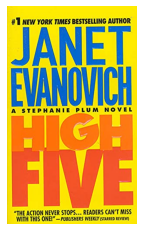

In [36]:
predictions2 = predictions.set_index('ISBN')
ur10 = books[books['ISBN']==predictions2.index[0]]["Image-URL-L"].to_list()[0] #user 243의 추천 도서 1번째의 이미지 구현
#image-url은 l, m, s 화질차이(L>M>S 순으로 화질이 좋다)
im0 = imread(ur10)

plt.figure(1)
plt.axis(False)
plt.imshow(im0)